In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("import successful")

Matplotlib is building the font cache; this may take a moment.


import successful


In [8]:
df=pd.read_csv("./delhi_ncr_aqi_dataset.csv")


In [9]:
df.head()

,datetime,date,year,month,day,hour,day_of_week,is_weekend,season,city,...,no2,so2,co,o3,temperature,humidity,wind_speed,visibility,aqi,aqi_category
0,2020-01-01 06:00:00,2020-01-01,2020,1,1,6,Wednesday,0,winter,Delhi,...,119.6,47.7,5.19,12.3,9.4,100,3.6,1.2,500,Severe
1,2020-01-01 12:00:00,2020-01-01,2020,1,1,12,Wednesday,0,winter,Delhi,...,117.9,39.3,4.32,15.8,20.6,50,5.9,1.4,500,Severe
2,2020-01-01 18:00:00,2020-01-01,2020,1,1,18,Wednesday,0,winter,Delhi,...,150.1,36.3,7.13,14.3,12.4,56,4.5,1.1,500,Severe
3,2020-01-01 23:00:00,2020-01-01,2020,1,1,23,Wednesday,0,winter,Delhi,...,142.0,30.3,4.90,13.2,14.4,48,5.8,1.4,500,Severe
4,2020-01-01 06:00:00,2020-01-01,2020,1,1,6,Wednesday,0,winter,Delhi,...,138.4,41.5,7.56,15.4,6.8,100,2.8,0.4,500,Severe


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,201664.0,2022.499544,1.708185,2020.0000,2021.0000,2022.5000,2024.0000,2025.0000
month,201664.0,6.521898,3.448995,1.0000,4.0000,7.0000,10.0000,12.0000
day,201664.0,15.732664,8.801392,1.0000,8.0000,16.0000,23.0000,31.0000
hour,201664.0,14.750000,6.378691,6.0000,10.5000,15.0000,19.2500,23.0000
is_weekend,201664.0,0.285584,0.451693,0.0000,0.0000,0.0000,1.0000,1.0000
latitude,201664.0,28.596791,0.112215,28.3722,28.5308,28.6246,28.6683,28.7762
longitude,201664.0,77.208600,0.125113,77.0266,77.0712,77.2010,77.3164,77.5040
pm25,201664.0,183.420341,193.138161,15.0000,55.3000,99.5000,254.7000,900.0000
pm10,201664.0,348.567402,370.016790,24.0000,104.1000,189.8000,481.2000,1979.7000
no2,201664.0,69.761495,75.972086,8.0000,19.9000,38.3000,94.0000,593.5000


In [12]:
df.isnull().sum()

datetime        0
date            0
year            0
month           0
day             0
hour            0
day_of_week     0
is_weekend      0
season          0
city            0
station         0
latitude        0
longitude       0
pm25            0
pm10            0
no2             0
so2             0
co              0
o3              0
temperature     0
humidity        0
wind_speed      0
visibility      0
aqi             0
aqi_category    0
dtype: int64

In [13]:
df.nunique()

datetime         8768
date             2192
year                6
month              12
day                31
hour                4
day_of_week         7
is_weekend          2
season              4
city                5
station            23
latitude           23
longitude          23
pm25             8404
pm10            16812
no2              4569
so2              1159
co               2148
o3                582
temperature       382
humidity           81
wind_speed        295
visibility        149
aqi               476
aqi_category        6
dtype: int64

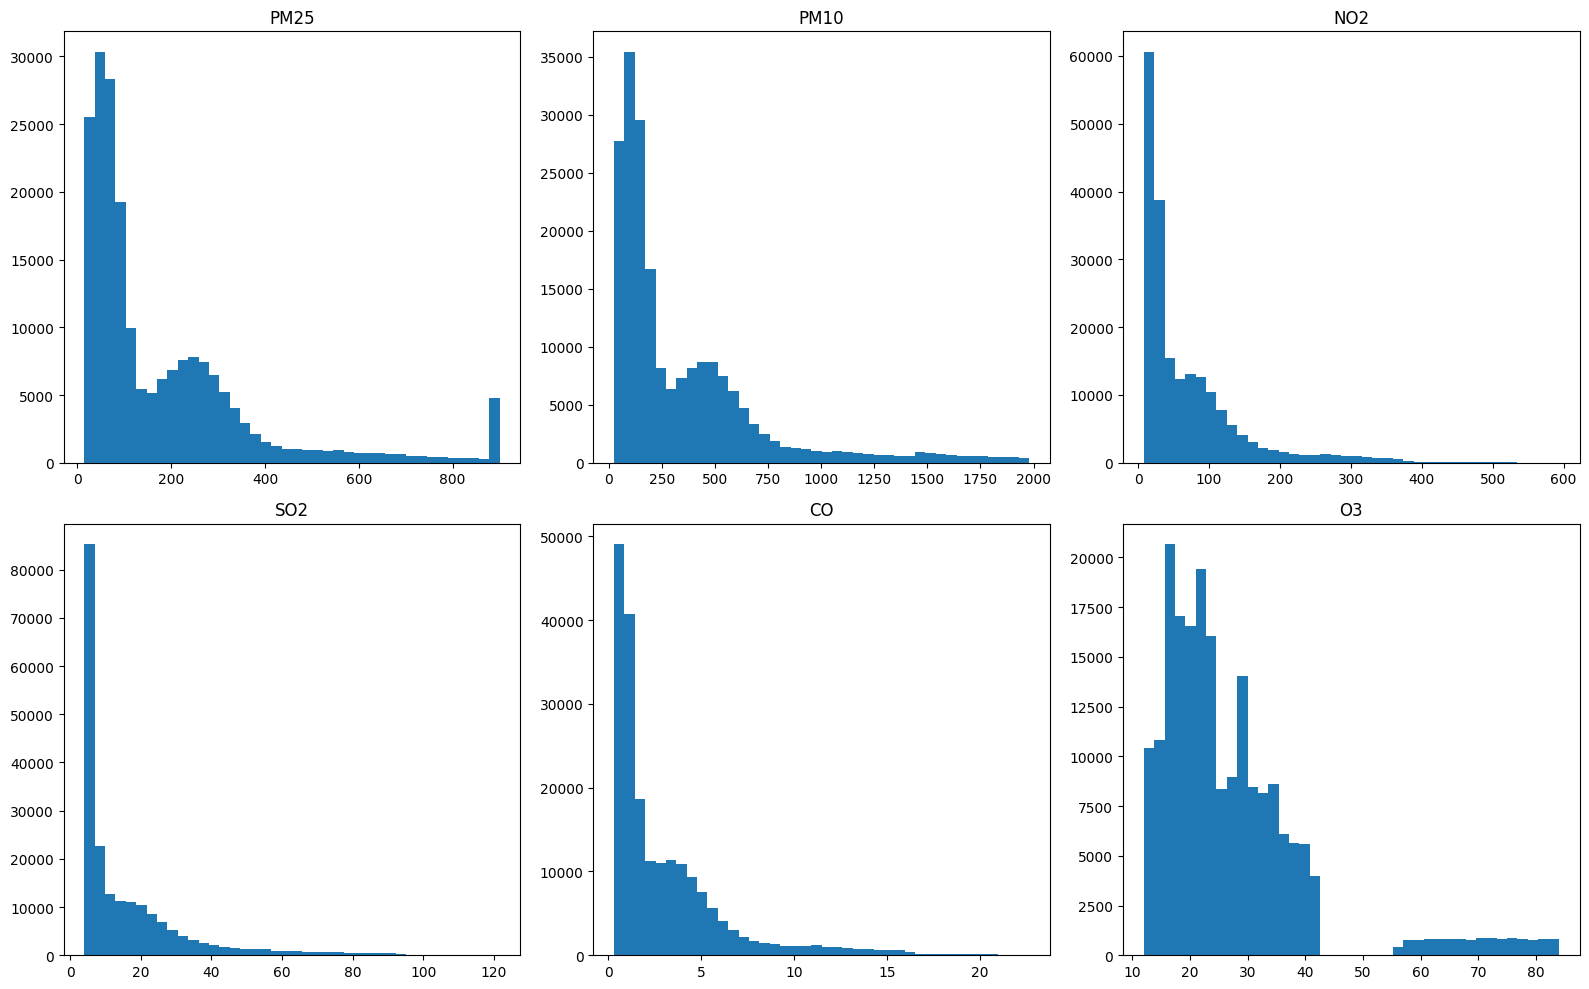

In [14]:
pollutants = ["pm25", "pm10", "no2", "so2", "co", "o3"]

plt.figure(figsize=(16,10))
for i, col in enumerate(pollutants, 1):
    plt.subplot(2,3,i)
    plt.hist(df[col], bins=40)
    plt.title(col.upper())
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

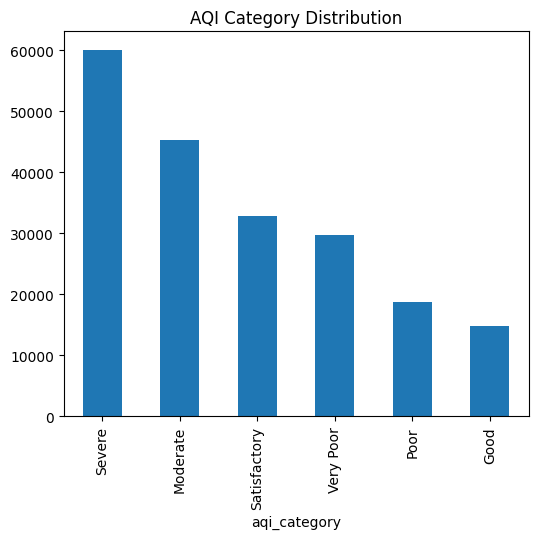

In [17]:
df['aqi_category'].value_counts().plot(kind='bar', figsize=(6,5))
plt.title("AQI Category Distribution")
plt.show

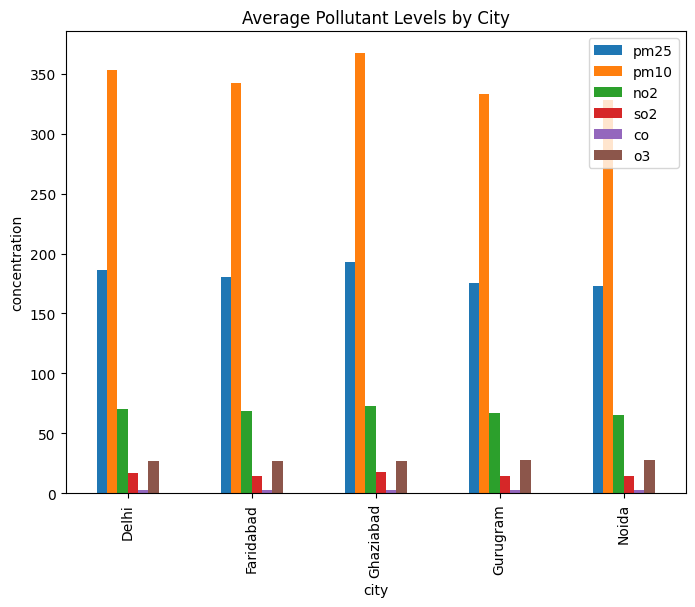

In [18]:
city_mean= df.groupby("city")[["pm25", "pm10", "no2", "so2", "co", "o3"]].mean()
city_mean.plot(kind='bar',figsize=(8,6))
plt.title("Average Pollutant Levels by City")
plt.ylabel("concentration")
plt.show()

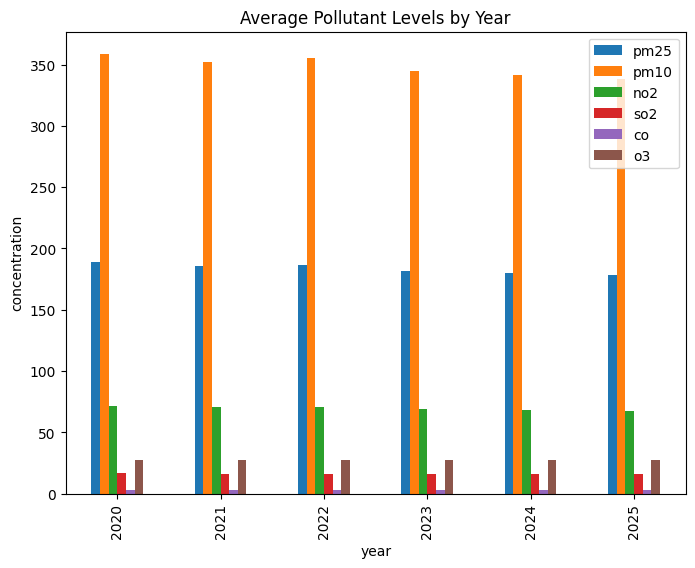

In [19]:
year_mean= df.groupby("year")[["pm25", "pm10", "no2", "so2", "co", "o3"]].mean()
year_mean.plot(kind="bar", figsize=(8,6))
plt.title("Average Pollutant Levels by Year")
plt.ylabel("concentration") 
plt.show()

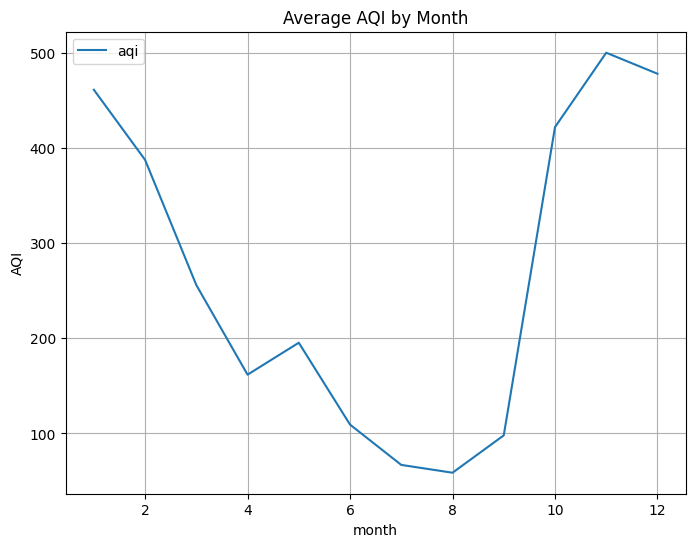

In [24]:
month_measure=df.groupby("month")[["aqi"]].mean()
month_measure.plot( figsize=(8,6))
plt.title("Average AQI by Month")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

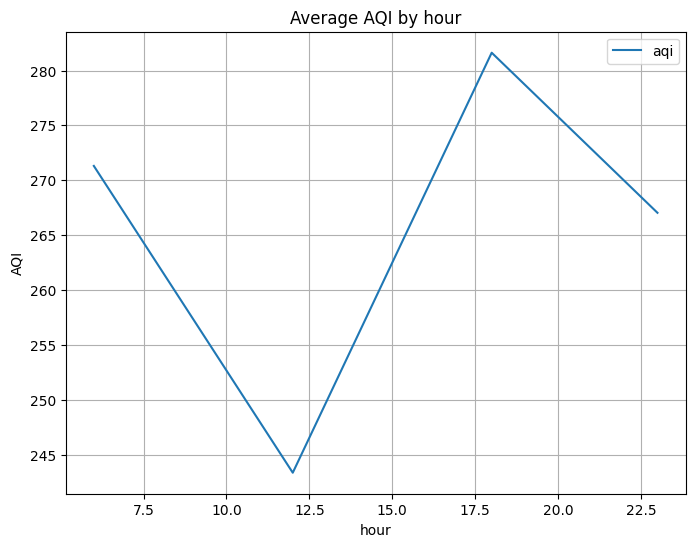

In [25]:
hour_measure=df.groupby("hour")[["aqi"]].mean()
hour_measure.plot( figsize=(8,6))
plt.title("Average AQI by hour")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

In [32]:
df["datetime"] = pd.to_datetime(df["datetime"]) 
df["year"] = df["datetime"].dt.year 
df["month"] = df["datetime"].dt.month 
df["day"] = df["datetime"].dt.day 
df["hour"] = df["datetime"].dt.hour 
df["day_of_week"] = df["datetime"].dt.dayofweek 
df["is_weekend"] = df["day_of_week"].isin([5,6]).astype(int)

In [34]:
cat_col= ["season","city","aqi_category", "day_of_week"]

df = pd.get_dummies(df, columns=cat_col, drop_first=True)

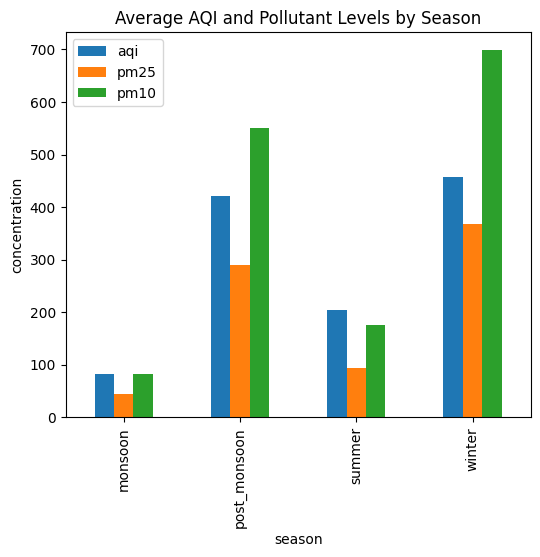

In [23]:
seasonal_avg = df.groupby("season")[["aqi", "pm25", "pm10"]].mean()
seasonal_avg.plot(kind="bar", figsize=(6,5))    
plt.title("Average AQI and Pollutant Levels by Season")
plt.ylabel("concentration")
plt.show()

In [6]:
%pip install matplotlib

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ----------------- ---------------------- 3.7/8.3 MB 17.4 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.3 MB 14.6 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 13.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 11.2 MB/s  0:00:00
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   -------------- ------------------------- 2.6/7.2 MB 12.3 MB/s eta 0:00:01
   ----------------------------- ---------- 5.2/7.2 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 7.2/7.2 MB 11.9 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- -------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
